In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
# Reading the dataset
titanic = pd.read_csv('titanic.csv')

In [11]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [12]:
# суммируем статистику
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [14]:
#находим типы данных
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB


In [27]:
#категоризирую пол
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

# #Создаю новый параметр Female size
# titanic['Female size'] = titanic[['Siblings/Spouses Aboard', 'Parents/Children Aboard']].sum(axis=1)

#определяю X как титаник без выживших и имени, потому что они не нужны, и y как выживших    
X, y =titanic.drop(['Survived', 'Name'], axis=1)[:800], titanic['Survived'][:800]

X.shape,y.shape

((800, 6), (800,))

In [28]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Appling Decision Tree

In [30]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[20,35,40,50,55,60], 
              'max_depth':[2,3,4,5,6,7,8,9],
              'class_weight':('balanced', None),
             }

In [79]:
dt_model = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(dt_model, parameters)
# gsearch.cv_results_
# model.fit(X_train, y_train)

In [80]:
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [20, 35, 40, 50, 55, 60]})

In [81]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 20}

In [82]:
model = gsearch.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)

In [83]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
scores

array([0.71487971, 0.67686368, 0.7754386 , 0.65909728, 0.57129187,
       0.65295056, 0.67272727, 0.67686368, 0.63884764, 0.6008316 ])

In [84]:
best_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=55)

In [85]:
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
scores

array([0.7005848 , 0.58709677, 0.7754386 , 0.65909728, 0.54777266,
       0.625     , 0.69498178, 0.63636364, 0.64966868, 0.61018826])

[Text(0.455, 0.9166666666666666, 'x[0] <= 0.224\nentropy = 0.952\nsamples = 640\nvalue = [402, 238]'),
 Text(0.21, 0.75, 'x[2] <= -0.86\nentropy = 0.994\nsamples = 287\nvalue = [130, 157]'),
 Text(0.08, 0.5833333333333334, 'x[5] <= 1.805\nentropy = 0.267\nsamples = 22\nvalue = [1, 21]'),
 Text(0.04, 0.4166666666666667, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.12, 0.4166666666666667, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.34, 0.5833333333333334, 'x[5] <= 0.35\nentropy = 0.999\nsamples = 265\nvalue = [129, 136]'),
 Text(0.2, 0.4166666666666667, 'x[4] <= 0.149\nentropy = 0.979\nsamples = 176\nvalue = [103, 73]'),
 Text(0.12, 0.25, 'x[5] <= -0.516\nentropy = 0.95\nsamples = 149\nvalue = [94, 55]'),
 Text(0.08, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.16, 0.08333333333333333, 'entropy = 0.963\nsamples = 142\nvalue = [87, 55]'),
 Text(0.28, 0.25, 'x[5] <= -0.162\nentropy = 0.918\nsamples = 27\nvalue = [9, 18]'),
 Text(0.24,

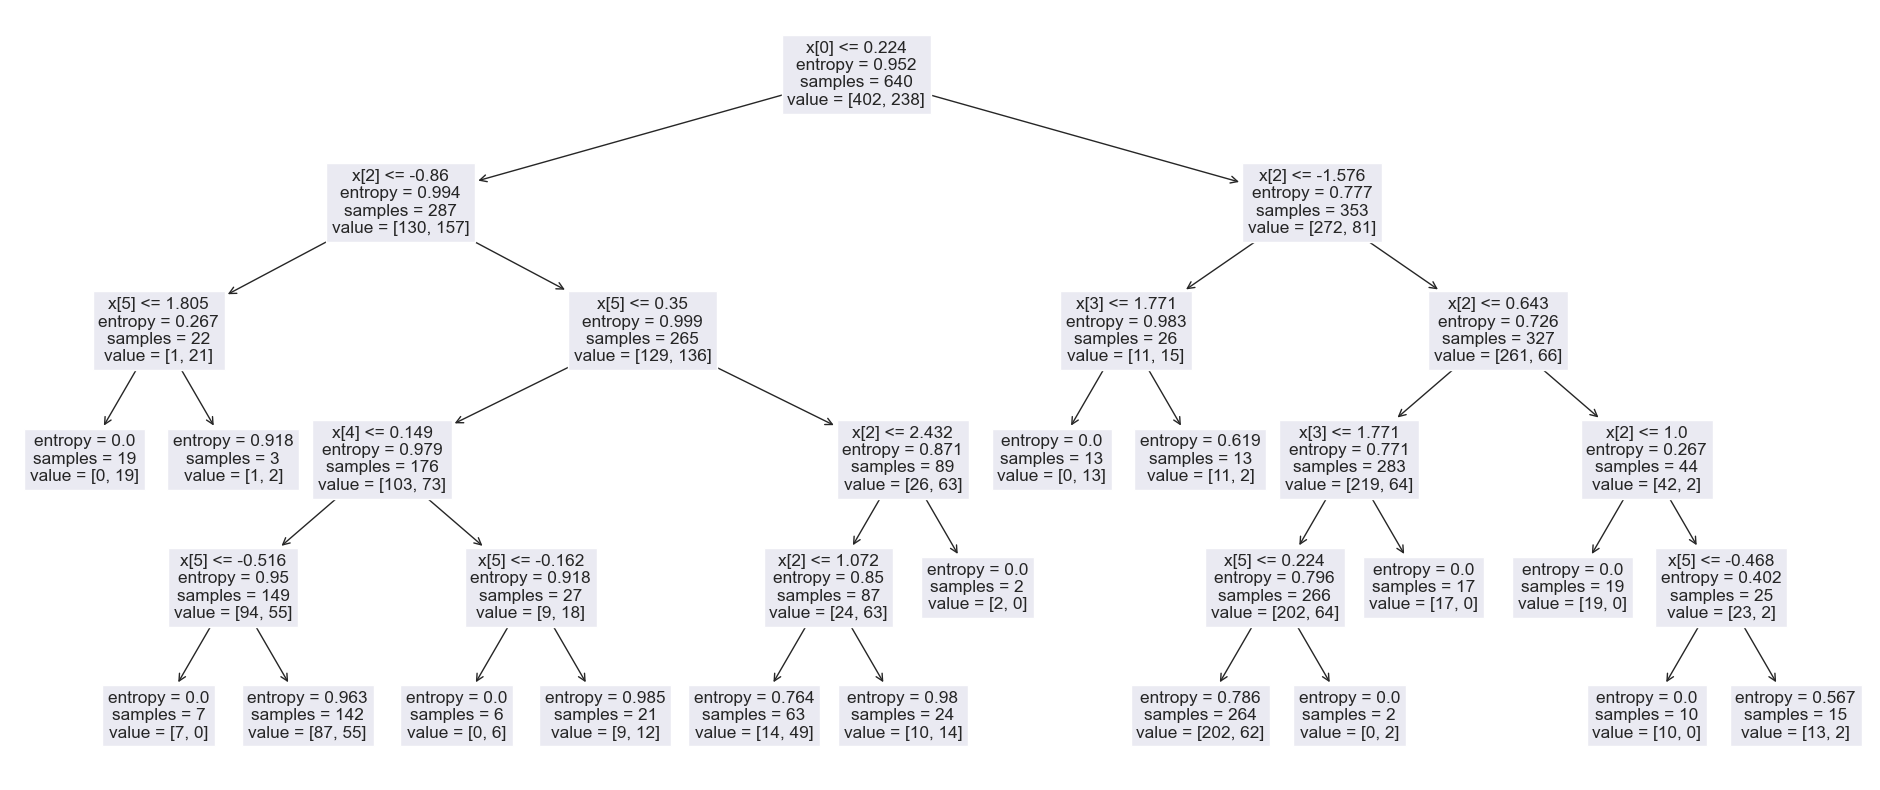

In [86]:
plt.figure(figsize=(24,10))
tree.plot_tree(model.fit(X_train_scaled,y_train))

In [87]:
y_pred = model.predict(X_test_scaled)

In [88]:
confusion_matrix(y_test,y_pred)

array([[74, 13],
       [38, 35]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        87
           1       0.73      0.48      0.58        73

    accuracy                           0.68       160
   macro avg       0.69      0.67      0.66       160
weighted avg       0.69      0.68      0.67       160



In [90]:
model.score(X_test_scaled,y_test)

0.68125